In [678]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [679]:
## Load the data
deliveries = pd.read_csv("D:\PRASANTA\PROJECT\IPL DATA ANALYSIS\Data\deliveries.csv")

matches = pd.read_csv("D:\PRASANTA\PROJECT\IPL DATA ANALYSIS\Data\matches.csv")



In [680]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [681]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


## Data Cleaning(deliveries table)

In [682]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [683]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [684]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [685]:
deliveries.shape

(260920, 17)

## Identify and Handle Missing Values

In [686]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [687]:
## fill null values in extras_type column

In [688]:
deliveries['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [689]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('Noextra')

In [690]:
deliveries['extras_type'].isnull().sum()

0

In [691]:
## Fill null values in player_dismissed columns

In [692]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('Noone')

In [693]:
deliveries['player_dismissed'].isnull().sum()

0

In [694]:
## Fill null values in dismissal_kind columns

In [695]:
deliveries['fielder'] = deliveries['fielder'].fillna(deliveries['bowler'])

In [696]:
deliveries['fielder'].isnull().sum()

0

In [697]:
## Fill null values in dismissal_kind columns

In [698]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [699]:
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('notout')

In [700]:
deliveries['dismissal_kind'].isnull().sum()

0

In [701]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Noone,notout,P Kumar
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Noone,notout,P Kumar
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar


##  Remove Duplicates

In [702]:
deliveries.duplicated().sum()

0

 ## Fix Inconsistent Formatting / Casing

In [703]:
## replace match_id column name into id 

In [704]:
deliveries = deliveries.rename(columns={'match_id':'id'})

In [705]:
## replace batting_team row name

In [706]:
deliveries['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [707]:
deliveries['batting_team'] = deliveries['batting_team'].replace({'Kolkata Knight Riders':'KKR', 'Royal Challengers Bangalore':'RCB',
       'Chennai Super Kings':'CSK', 'Kings XI Punjab':'KXIP', 'Rajasthan Royals':'RR',
       'Delhi Daredevils':'DD', 'Mumbai Indians':'MI', 'Deccan Chargers':'DCS',
       'Kochi Tuskers Kerala':'KTS', 'Pune Warriors':'PW', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiants':'RPS', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Delhi Capitals':'DC', 'Punjab Kings':'KXIP',
       'Lucknow Super Giants':'LSG', 'Gujarat Titans':'GT',
       'Royal Challengers Bengaluru':'RCB'})

In [708]:
deliveries['batting_team'].unique()

array(['KKR', 'RCB', 'CSK', 'KXIP', 'RR', 'DD', 'MI', 'DCS', 'KTS', 'PW',
       'SRH', 'RPS', 'GL', 'DC', 'LSG', 'GT'], dtype=object)

In [709]:
## replace bowling_team row name


In [710]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [711]:
deliveries['bowling_team'] = deliveries['bowling_team'].replace({'Kolkata Knight Riders':'KKR', 'Royal Challengers Bangalore':'RCB',
       'Chennai Super Kings':'CSK', 'Kings XI Punjab':'KXIP', 'Rajasthan Royals':'RR',
       'Delhi Daredevils':'DD', 'Mumbai Indians':'MI', 'Deccan Chargers':'DCS',
       'Kochi Tuskers Kerala':'KTS', 'Pune Warriors':'PW', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiants':'RPS', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Delhi Capitals':'DC', 'Punjab Kings':'KXIP',
       'Lucknow Super Giants':'LSG', 'Gujarat Titans':'GT',
       'Royal Challengers Bengaluru':'RCB'})

In [712]:
deliveries['bowling_team'].unique()

array(['RCB', 'KKR', 'KXIP', 'CSK', 'DD', 'RR', 'MI', 'DCS', 'KTS', 'PW',
       'SRH', 'RPS', 'GL', 'DC', 'GT', 'LSG'], dtype=object)

In [713]:
deliveries.head()

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Noone,notout,P Kumar
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Noone,notout,P Kumar
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar


## Handle Incorrect Data Types

In [714]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [715]:
## All columns have the correct data types

## Data Cleaning(Matches table)

In [716]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [717]:
matches.shape

(1095, 20)

In [718]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [719]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [720]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## Identify and Handle Missing Values

In [721]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [722]:
matches[
        matches['winner'].isnull() & 
      
        matches['player_of_match'].isnull() &
        matches['result_margin'].isnull() &
        matches['target_runs'].isnull() & 
        matches['target_overs'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [723]:
delete = [501265, 829763, 1359519]

matches = matches[~matches['id'].isin(delete)]  


In [724]:
## fill null values in city column

In [725]:
matches.loc[matches['city'].isnull(), 'city'] = matches.loc[matches['city'].isnull(), 'venue']


In [726]:
matches['city'].isnull().sum()

0

In [727]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium', 'Rajkot', 'Kanpur',
       'Bengaluru', 'Dubai', 'Sharjah', 'Navi Mumbai', 'Lucknow',
       'Guwahati', 'Mohali'], dtype=object)

In [728]:
## replacestadium name into city name

In [729]:
matches['city'] = matches['city'].replace({'Sharjah Cricket Stadium':'Sharjah','Dubai International Cricket Stadium':'Dubai'})

In [730]:
## Fill null values in player_of_match column

In [731]:
matches['player_of_match'].isnull().sum()

2

In [732]:
deliveries.head()

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Noone,notout,P Kumar
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Noone,notout,P Kumar
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,Noextra,0,Noone,notout,P Kumar


In [733]:
missing_potm_ids = matches.loc[matches['player_of_match'].isnull()]['id'].tolist() 

In [734]:
missing_deliveries = deliveries[deliveries['id'].isin(missing_potm_ids)]

In [735]:
batsman_stats = missing_deliveries.groupby(['id','batter'])['batsman_runs'].sum().reset_index()

In [736]:
top_scores = batsman_stats.loc[batsman_stats.groupby('id')['batsman_runs'].idxmax()]

In [737]:
for _, row in top_scores.iterrows():
    matches.loc[matches['id']  == row['id'],'player_of_match'] = row['batter']
    

In [738]:
matches['player_of_match'].isnull().sum()

0

In [739]:
## Fill null values in winner column

In [740]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       nan, 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [741]:
matches['winner']  = matches['winner'].fillna('unknown')

In [742]:
matches['winner'].isnull().sum()

0

In [743]:
## fill null value in result_margin column

In [744]:
inning_runs= deliveries.groupby(['id','inning'])['total_runs'].sum().unstack()
inning_runs=inning_runs[[1,2]]

In [745]:
inning_runs.columns = ['inning1_runs','inning2_runs']

In [746]:
inning_runs

,inning1_runs,inning2_runs
id,,
335982,222.0,82.0
335983,240.0,207.0
335984,129.0,132.0
335985,165.0,166.0
335986,110.0,112.0
...,...,...
1426307,214.0,215.0
1426309,159.0,164.0
1426310,172.0,174.0


In [747]:
matches=matches.merge(inning_runs,left_on='id',right_on='id',how='left')

In [748]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,inning1_runs,inning2_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,222.0,82.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,240.0,207.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,129.0,132.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,165.0,166.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,110.0,112.0


In [749]:
matches['result_margin'] = matches['inning1_runs'] - matches['inning2_runs']

In [750]:
matches['result_margin'] = matches['result_margin'].astype(str)

In [751]:
matches['result_margin'] = matches['result_margin'].str.replace('-','',regex=False)

In [752]:
matches['result_margin'].isnull().sum()

0

In [753]:
matches['inning1_runs'].isnull().sum()

0

In [754]:
matches['inning2_runs'].isnull().sum()

0

In [755]:
deliveries['total_runs'].unique()

array([1, 0, 4, 6, 5, 2, 3, 7], dtype=int64)

In [756]:
matches.head(790)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,inning1_runs,inning2_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,222.0,82.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,240.0,207.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,3.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,129.0,132.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,1.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,165.0,166.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,2.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,110.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,1216526,2020/21,Abu Dhabi,2020-10-16,League,Q de Kock,Sheikh Zayed Stadium,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,...,wickets,1.0,149.0,20.0,N,NaN,CB Gaffaney,VK Sharma,148.0,149.0
786,1216509,2020/21,Sharjah,2020-10-17,League,S Dhawan,Sharjah Cricket Stadium,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,...,wickets,6.0,180.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth,179.0,185.0
787,1216522,2020/21,Dubai,2020-10-17,League,AB de Villiers,Dubai International Cricket Stadium,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,...,wickets,2.0,178.0,20.0,N,NaN,AK Chaudhary,Nitin Menon,177.0,179.0
788,1216512,2020/21,Abu Dhabi,2020-10-18,League,LH Ferguson,Sheikh Zayed Stadium,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,...,tie,0.0,164.0,20.0,Y,NaN,PG Pathak,S Ravi,163.0,163.0


In [757]:
matches.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           0
target_overs          0
super_over            0
method             1071
umpire1               0
umpire2               0
inning1_runs          0
inning2_runs          0
dtype: int64

In [758]:
## Fill null value in method column

In [759]:
matches['method'].unique()

array([nan, 'D/L'], dtype=object)

In [760]:
matches['method'] = matches['method'].fillna('No D/L')

In [761]:
matches['method'].isnull().sum()

0

In [762]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
inning1_runs       0
inning2_runs       0
dtype: int64

## Remove Duplicates

In [763]:
matches.duplicated().sum()

0

 ## Fix Inconsistent Formatting / Casing

In [764]:
## replace teams full name into short version

In [765]:
matches['team1'] = matches['team1'].replace({'Kolkata Knight Riders':'KKR', 'Royal Challengers Bangalore':'RCB',
       'Chennai Super Kings':'CSK', 'Kings XI Punjab':'KXIP', 'Rajasthan Royals':'RR',
       'Delhi Daredevils':'DD', 'Mumbai Indians':'MI', 'Deccan Chargers':'DCS',
       'Kochi Tuskers Kerala':'KTS', 'Pune Warriors':'PW', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiants':'RPS', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Delhi Capitals':'DC', 'Punjab Kings':'KXIP',
       'Lucknow Super Giants':'LSG', 'Gujarat Titans':'GT',
       'Royal Challengers Bengaluru':'RCB'})


matches['team2'] = matches['team2'].replace({'Kolkata Knight Riders':'KKR', 'Royal Challengers Bangalore':'RCB',
       'Chennai Super Kings':'CSK', 'Kings XI Punjab':'KXIP', 'Rajasthan Royals':'RR',
       'Delhi Daredevils':'DD', 'Mumbai Indians':'MI', 'Deccan Chargers':'DCS',
       'Kochi Tuskers Kerala':'KTS', 'Pune Warriors':'PW', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiants':'RPS', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Delhi Capitals':'DC', 'Punjab Kings':'KXIP',
       'Lucknow Super Giants':'LSG', 'Gujarat Titans':'GT',
       'Royal Challengers Bengaluru':'RCB'})


matches['winner'] = matches['winner'].replace({'Kolkata Knight Riders':'KKR', 'Royal Challengers Bangalore':'RCB',
       'Chennai Super Kings':'CSK', 'Kings XI Punjab':'KXIP', 'Rajasthan Royals':'RR',
       'Delhi Daredevils':'DD', 'Mumbai Indians':'MI', 'Deccan Chargers':'DCS',
       'Kochi Tuskers Kerala':'KTS', 'Pune Warriors':'PW', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiants':'RPS', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Delhi Capitals':'DC', 'Punjab Kings':'KXIP',
       'Lucknow Super Giants':'LSG', 'Gujarat Titans':'GT',
       'Royal Challengers Bengaluru':'RCB'})

matches['toss_winner'] = matches['toss_winner'].replace({'Kolkata Knight Riders':'KKR', 'Royal Challengers Bangalore':'RCB',
       'Chennai Super Kings':'CSK', 'Kings XI Punjab':'KXIP', 'Rajasthan Royals':'RR',
       'Delhi Daredevils':'DD', 'Mumbai Indians':'MI', 'Deccan Chargers':'DCS',
       'Kochi Tuskers Kerala':'KTS', 'Pune Warriors':'PW', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiants':'RPS', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Delhi Capitals':'DC', 'Punjab Kings':'KXIP',
       'Lucknow Super Giants':'LSG', 'Gujarat Titans':'GT',
       'Royal Challengers Bengaluru':'RCB'})


In [766]:
matches['team1'].unique()

array(['RCB', 'KXIP', 'DD', 'MI', 'KKR', 'RR', 'DCS', 'CSK', 'KTS', 'PW',
       'SRH', 'GL', 'RPS', 'DC', 'LSG', 'GT'], dtype=object)

In [767]:
matches['team2'].unique()

array(['KKR', 'CSK', 'RR', 'RCB', 'DCS', 'KXIP', 'DD', 'MI', 'KTS', 'PW',
       'SRH', 'RPS', 'GL', 'DC', 'GT', 'LSG'], dtype=object)

In [768]:
matches['winner'].unique()

array(['KKR', 'CSK', 'DD', 'RCB', 'RR', 'KXIP', 'DCS', 'MI', 'PW', 'KTS',
       'SRH', 'unknown', 'RPS', 'GL', 'DC', 'GT', 'LSG'], dtype=object)

In [769]:
## correct season year 

In [770]:
matches['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [771]:
matches['season'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1092 entries, 0 to 1091
Series name: season
Non-Null Count  Dtype 
--------------  ----- 
1092 non-null   object
dtypes: object(1)
memory usage: 8.7+ KB


In [772]:
matches['season'] = matches['season'].replace({'2007/08':'2008','2009/10':'2010','2020/21':'2020'})

In [773]:
matches['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [774]:
## Correct date column

In [775]:
matches['month'] = matches['date'].str.split('-').str[1]

In [776]:
matches['date'] = matches['date'].str.split('-').str[2]

In [777]:
matches['date'].unique()

array(['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '31'], dtype=object)

In [778]:
matches['venue'] = matches['venue'].str.split(',').str[0]

In [779]:
matches['venue'].unique()

array(['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium', 'Sardar Patel Stadium',
       'Barabati Stadium', 'Vidarbha Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadiu

In [780]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,inning1_runs,inning2_runs,month
0,335982,2008,Bangalore,18,League,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,...,140.0,223.0,20.0,N,No D/L,Asad Rauf,RE Koertzen,222.0,82.0,04
1,335983,2008,Chandigarh,19,League,MEK Hussey,Punjab Cricket Association Stadium,KXIP,CSK,CSK,...,33.0,241.0,20.0,N,No D/L,MR Benson,SL Shastri,240.0,207.0,04
2,335984,2008,Delhi,19,League,MF Maharoof,Feroz Shah Kotla,DD,RR,RR,...,3.0,130.0,20.0,N,No D/L,Aleem Dar,GA Pratapkumar,129.0,132.0,04
3,335985,2008,Mumbai,20,League,MV Boucher,Wankhede Stadium,MI,RCB,MI,...,1.0,166.0,20.0,N,No D/L,SJ Davis,DJ Harper,165.0,166.0,04
4,335986,2008,Kolkata,20,League,DJ Hussey,Eden Gardens,KKR,DCS,DCS,...,2.0,111.0,20.0,N,No D/L,BF Bowden,K Hariharan,110.0,112.0,04


## Handle Incorrect Data Types

In [781]:
## change data types

matches.info()

In [782]:
matches['result_margin'] = matches['result_margin'].astype(float)
matches['result_margin'] = matches['result_margin'].astype(int)

In [783]:
matches['target_runs'] = matches['target_runs'].astype(int)

In [784]:
matches['target_overs'] = matches['target_overs'].astype(int)

In [785]:
matches['inning1_runs'] = matches['inning1_runs'].astype(int)

In [786]:
matches['inning2_runs'] = matches['inning2_runs'].astype(int)

In [787]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,inning1_runs,inning2_runs,month
0,335982,2008,Bangalore,18,League,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,...,140,223,20,N,No D/L,Asad Rauf,RE Koertzen,222,82,04
1,335983,2008,Chandigarh,19,League,MEK Hussey,Punjab Cricket Association Stadium,KXIP,CSK,CSK,...,33,241,20,N,No D/L,MR Benson,SL Shastri,240,207,04
2,335984,2008,Delhi,19,League,MF Maharoof,Feroz Shah Kotla,DD,RR,RR,...,3,130,20,N,No D/L,Aleem Dar,GA Pratapkumar,129,132,04
3,335985,2008,Mumbai,20,League,MV Boucher,Wankhede Stadium,MI,RCB,MI,...,1,166,20,N,No D/L,SJ Davis,DJ Harper,165,166,04
4,335986,2008,Kolkata,20,League,DJ Hussey,Eden Gardens,KKR,DCS,DCS,...,2,111,20,N,No D/L,BF Bowden,K Hariharan,110,112,04


## Data Visualization

1. What was the count of matches played in each season?

In [788]:
import plotly.express as px

## Group  by season and count
matches_per_season = matches.groupby('season')['id'].count().reset_index()
matches_per_season.columns = ['Season', 'Match_Count']

## Plot

fig = px.bar(matches_per_season, x = 'Season', y = 'Match_Count',
            text = 'Match_Count', 
            title = 'Number Of Matches Played Each Season', 
            labels = {'Season' : 'Season', 'Match_Count' : 'Match_Count'},
            color = 'Match_Count',
            color_continuous_scale = 'blues')

## Format text and layout

fig.update_traces(textposition = 'outside')
fig.update_layout(xaxis = dict(type = 'category'))
fig.show()

2. How many runs were scored in each season ?

In [789]:
import plotly.express as px

## Group by season and sum
total_runs_per_season = matches.groupby('season')[['inning1_runs', 'inning2_runs']].sum().reset_index()

total_runs_per_season['Total_Run'] = total_runs_per_season['inning1_runs'] + total_runs_per_season['inning2_runs']

total_runs_per_season = total_runs_per_season[['season','Total_Run']]
total_runs_per_season.columns = ['Season', 'Total_Run']

## Plot
fig = px.line(total_runs_per_season, x = 'Season', y = 'Total_Run',
             width = 1000,
             height = 600,
                text = 'Total_Run',
                title = 'Total Runs Scored In Each Season',
                labels = {'Season' : 'Season', 'Total_Run' : 'Total Run'},
                )

## Format text and Layout
fig.update_traces(textposition = 'top center')
fig.update_layout(xaxis = dict(type='category'))
fig.show()


3. what were the runs scored per match in differnt season?

In [790]:
# 1. Total runs = inning1_runs + inning2_runs
matches['Total_runs']  = matches['inning1_runs']  + matches['inning2_runs']

# 2. Group by season: total runs
total_runs_per_season = matches.groupby('season')['Total_runs'].sum()

# 3. Group by season: match count
matches_per_season = matches.groupby('season')['id'].count()

# 4. Runs per match = total runs / number of matches
runs_per_match = (total_runs_per_season/matches_per_season).reset_index()
runs_per_match = runs_per_match.round(2)
runs_per_match.columns=['Season','Runs_Per_Match']


## plot

fig = px.line(runs_per_match, x = 'Season', y = 'Runs_Per_Match',
             width = 1000,
             height = 500,
            text = 'Runs_Per_Match',
            title = 'Average Runs Per Match in Each IPL Season',
            labels = {'Season' : 'Season', 'Runs_Per_Match' : 'Runs Per Match'},
            )

## Format text and layout

fig.update_traces(textposition = 'top center')
fig.update_layout(xaxis = dict(type='category'))
fig.show()

4. Who has Umpired the most ?

In [791]:
# Combine both umpire columns into a single Series
all_umpires = pd.concat([matches['umpire1'], matches['umpire2']])

# Count  of each umpire
umpire_counts = all_umpires.value_counts().reset_index()
umpire_counts.columns = ['Umpire', 'Match_Count']


top_10_umpires = umpire_counts.head(10)


In [792]:
import plotly.express as px

## Plot
fig = px.bar(top_10_umpires, x = 'Umpire', y = 'Match_Count',
             width=1000,
             height=600,
            text = 'Match_Count',
            title = 'Top 10 Most Experienced IPL Umpires',
            labels = {'Umpire' : 'Umpire','Match_Count' : 'Match Count'},
            color = 'Match_Count',
            color_continuous_scale = 'balance')


## Format Text and layout

fig.update_traces(textposition = 'outside')
fig.update_layout(xaxis = dict(type='category'))


5. Which team has won the most Tosses?

In [793]:
## Data

matches['toss_winner'].head()

0    RCB
1    CSK
2     RR
3     MI
4    DCS
Name: toss_winner, dtype: object

In [794]:
teams = matches['toss_winner'].value_counts().reset_index()
top_10_teams = teams.head(10)
top_10_teams.columns = ['Team','Match_Count']


## Plot

fig = px.bar(top_10_teams, x = 'Team', y = 'Match_Count',
             width = 1000,
             height = 600,
            text = 'Match_Count',
            title = 'Top 10 Toss Winner Team',
            labels = [{'Team' : 'Teams', 'Match_Count' : 'Match Count'}],
            color = 'Match_Count',
            color_continuous_scale = 'delta')

## Format text and layout

fig.update_traces(textposition = 'outside')
fig.update_layout(xaxis = dict(type='category'))
fig.show()

6. What does the team decide after winning the toss ?

In [795]:
## Data

decide = matches['toss_decision'].value_counts().reset_index()
decide.columns = ['Category', 'Value']

## Plot

fig = px.pie(decide, 
             width = 1000,
             height = 600,
            names= 'Category',
            values = 'Value',
            title = 'Percentage Of Decision After Winning Toss',
            hole =0.4)

## Format text 

fig.update_traces(textinfo = 'label + percent')

fig.show()

7. How toss decision varies across season ?

In [796]:
## Data 

toss_decision_season = matches.groupby('season')['toss_decision'].value_counts().reset_index()
toss_decision_season.columns = ['Season', 'Toss_Decision','Count']

## Plot

fig = px.bar(toss_decision_season, x = 'Season', y = 'Count',
             width = 1000,
             height=600,
            color = 'Toss_Decision',
            barmode = 'group',
             text = 'Count',
            title = 'Toss Decisions Across IPL Seasons',
            labels = [{'Season' : 'Season', 'Toss_Decision' : 'Decision'}])

## Format text and layout

fig.update_traces(textposition = 'outside')
fig.update_layout(xaxis = dict(type='category'))

fig.show()



8. Does wininng the toss implies wininng the game ?

In [797]:
## Data 

matches['toss_win_and_match_win'] = np.where(matches['toss_winner'] == matches['winner'], 'Yes', 'No')
toss_win_and_match_win = matches['toss_win_and_match_win'].value_counts().reset_index()
toss_win_and_match_win.columns = ['Category','Count']

## Plot

fig = px.pie(toss_win_and_match_win,
             width = 1000,
             height = 600,
            names  = 'Category',
             values = 'Count',
            title = 'Percentage of Toss Win and Match Win',
            hole =0.4)

## Format text a

fig.update_traces(textinfo = 'label + percent')

fig.show()


9. How many times chasing teams has won the match ?

In [798]:
## Data

matches['chasing_won'] = np.where(matches['result'] == 'runs','Yes','No')

chasing_won = matches['chasing_won'].value_counts().reset_index()
chasing_won.columns = ['Category', 'Count']

## Plot

fig = px.pie(chasing_won, 
            width = 1000,
            height = 600,
            names = 'Category',
            values = 'Count',
            title = 'Percentage of Chasing Teams Has Won The Match',
            hole = 0.4)

## Format text

fig.update_traces(textinfo = 'label+percent')
fig.show()

10. Which all teams had won the tournamnet ?

In [799]:
## Data

final_winner = matches.groupby('season').tail(1)[['season','winner']]
final_winner.columns = ['Season','Final_Winner']
most_win = final_winner['Final_Winner'].value_counts().reset_index()
most_win.columns = ['Wininng_Team', 'Count']

## Plot

fig = px.bar(most_win,x = 'Wininng_Team', y = 'Count',
             width = 1000,
             height = 600,
             text = 'Count',
             color = 'Count',
             title = 'IPL Trophies Won By Each Team',
            labels = {'Wininng_Team' : 'Wininng Team','Count' : 'Count'},
            color_continuous_scale = 'solar')
## Format text 

fig.update_traces(textposition = 'outside')

fig.show()



11. Which team has played the most of the matches ?

In [800]:
## Data

total_matches = pd.concat([matches['team1'],matches['team2']])
most_matches = total_matches.value_counts().reset_index()
most_matches.columns = ['Team_Name', 'Total_Matches']

## Plot

fig = px.bar(most_matches, x = 'Team_Name', y = 'Total_Matches',
            width = 1000,
            height = 600,
            text = 'Total_Matches',
            labels = {'Team'  : 'Team', 'Total_Matches' : 'Total Matches'},
            color = 'Total_Matches',
            color_continuous_scale = 'Viridis')

## Text format 
fig.update_traces(textposition = 'outside')
fig.show()

12. Which team has won the most number of times ?

In [801]:
## Data
most_win = matches['winner'].value_counts().reset_index()
most_wins = most_win.head(10)

most_wins.columns = ['Team', 'Win']

## Plot

fig = px.bar(most_wins, x = 'Team', y = 'Win',
            width = 1000,
            height = 600,
            text = 'Win',
            labels = {'Team' : 'Team', 'Win' : 'Win'},
            color = 'Win',
            color_continuous_scale = 'viridis')

## Format text 

fig.update_traces(textposition = 'outside')
fig.show()

13. Which team has the highest winning percentage ?

In [802]:
## Data 


## Total matches count 
total_matches = pd.concat([matches['team1'],matches['team2']])
most_matches = total_matches.value_counts().reset_index()
most_matches.columns = ['Team', 'Total_Matches']

## Total Win Count
most_win = matches['winner'].value_counts().reset_index()
most_win.columns = ['Team', 'Win']

## Win percentage
most_win['wininng_percentage'] = (most_win['Win'] / most_matches['Total_Matches']) * 100
most_win['wininng_percentage'] = wininng_percentage.round(2)

wininng_percent = most_win[['Team', 'wininng_percentage']]
wininng_percent.columns = ['Team', 'Percentage']

win_percentage = wininng_percent.head(12)




## Plot

fig = px.bar(win_percentage, x = 'Team', y ='Percentage',
            width = 1000, 
            height = 600,
            text = 'Percentage',
            labels = {'Team' : 'Team', 'Percentage' : 'Percentage'},
            color = 'Percentage',
            color_continuous_scale = 'Viridis')

## Format text

fig.update_traces(textposition = 'outside')
fig.show()






14. Is there any lucky venue for a perticular team ?

In [803]:
## Data
team_name = 'MI'
team_wins = matches[matches['winner'] == team_name]
top_venues = team_wins['venue'].value_counts().head(10).reset_index()
top_venues.columns = ['Venue', 'Win_Count']

In [804]:
## Plot
fig = px.pie(top_venues,
             names = 'Venue',
             values = 'Win_Count',
            width = 1000,
            height = 600,
            title = 'Wins at different venues for MI :',
             hole = 0.4)

## Format text
fig.update_traces(textinfo='percent+label') 
fig.show()


In [805]:
## Data
team_name = 'CSK'
team_wins = matches[matches['winner'] == team_name]
top_venues = team_wins['venue'].value_counts().head(10).reset_index()
top_venues.columns = ['Venue', 'Win_Count']

In [806]:
## Plot
fig = px.pie(top_venues,
            names = 'Venue',
            values = 'Win_Count',
             width = 1000,
             height = 600,
            title = 'Wins at different venue for CSK :',
            hole =0.4)

## Format text
fig.update_traces(textinfo = 'label+percent')
fig.show()

In [807]:
## Data
team_name = 'RCB'
team_wins = matches[matches['winner'] == team_name]
top_venues = team_wins['venue'].value_counts().head(10).reset_index()
top_venues.columns = ['Venue', 'Win_Count']

In [808]:
## Plot
fig = px.pie(top_venues,
            names = 'Venue',
            values = 'Win_Count',
             width = 1000,
             height = 600,
            title = 'Wins at different venue for RCB :',
            hole =0.4)

## Format text
fig.update_traces(textinfo = 'label+percent')
fig.show()

In [809]:
## Data
team_name = 'KKR'
team_wins = matches[matches['winner'] == team_name]
top_venues = team_wins['venue'].value_counts().head(10).reset_index()
top_venues.columns = ['Venue', 'Win_Count']

In [810]:
## Plot
fig = px.pie(top_venues,
            names = 'Venue',
            values = 'Win_Count',
             width = 1000,
             height = 600,
            title = 'Wins at different venue for KKR :',
            hole =0.4)

## Format text
fig.update_traces(textinfo = 'label+percent')
fig.show()

15. Comparison between two teams

In [811]:
## Data

team1 ='MI'
team2 = 'CSK'
comparison = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |  ((matches['team1'] == team2) & (matches['team2'] == team))]

two_teams_comparison = comparison.groupby(['season','winner']).size().reset_index(name = 'Win_Count')
two_teams_comparison= two_teams_comparison.sort_values('season')


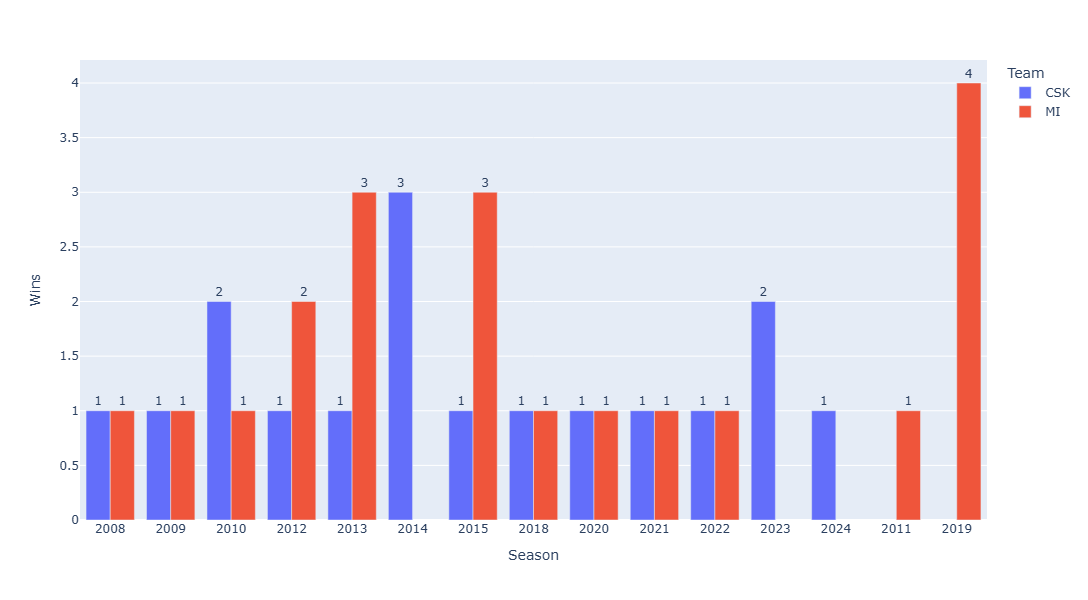

In [812]:
## Plot

fig = px.bar(two_teams_comparison, x = 'season', y = 'Win_Count',
            width = 1000,
            height = 600,
            text = 'Win_Count',
            labels = {'season': 'Season', 'winner': 'Team', 'Win_Count': 'Wins'},
            color = 'winner',
            barmode = 'group')

## Format text and layout

fig.update_traces(textposition = 'outside')
fig.update_layout(xaxis = dict(type='category'))
fig.show()

Particular Batsman Analysis :

In [832]:
## Data
batsman = 'RG Sharma'

batsman_data = deliveries[deliveries['batter'] == batsman]
dismiss = batsman_data.groupby('batter')['dismissal_kind'].value_counts().reset_index()
dismiss_kind  = dismiss.tail(-1)

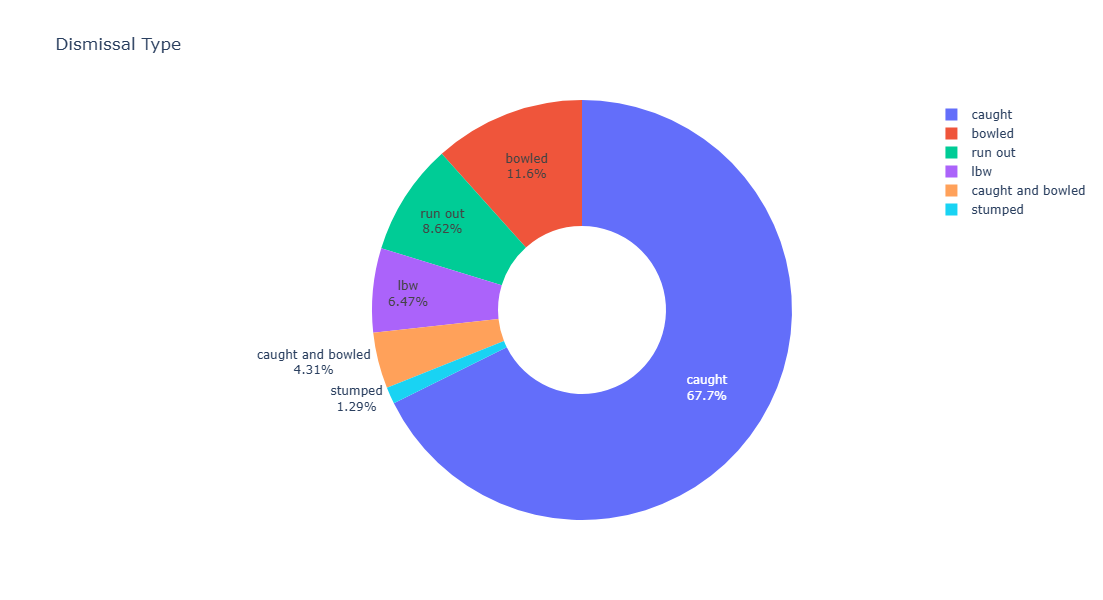

In [833]:
## Plot

fig = px.pie(dismiss_kind, names = 'dismissal_kind',
             values = 'count',
             width = 1000,
             height = 600,
             title = 'Dismissal Type',
             hole = 0.4)

## Format text
fig.update_traces(textinfo = 'label+percent')
fig.show()

In [848]:
run = 4
batsman_run = batsman_data[batsman_data['batsman_runs'] == run]
rohit4_runs = batsman_run['batsman_runs'].count()
rohit4_runs

599

In [852]:
run = 6
batsman_run = batsman_data[batsman_data['batsman_runs'] == run]
rohit6_runs = batsman_run['batsman_runs'].count()
print(rohit6_runs, 'Sixes Hit By', batsman)

281 Sixes Hit By RG Sharma


In [853]:
rohit_total_run = batsman_data['batsman_runs'].sum()
rohit_total_run

6630

In [891]:
Run = [1,2,3,4,5,6]
for i in Run :
        print(batsman,'Scored Runs From',i,':', (batsman_data['batsman_runs'] == i).sum())
    


RG Sharma Scored Runs From 1 : 1996
RG Sharma Scored Runs From 2 : 263
RG Sharma Scored Runs From 3 : 7
RG Sharma Scored Runs From 4 : 599
RG Sharma Scored Runs From 6 : 281


In [902]:
## Data
run = batsman_data['batsman_runs'].value_counts().tail(-1).reset_index()
runs = run.head(4)
runs.columns = ['Run_Type', 'Total_Run']
runs

,Run_Type,Total_Run
0,1,1996
1,4,599
2,6,281
3,2,263


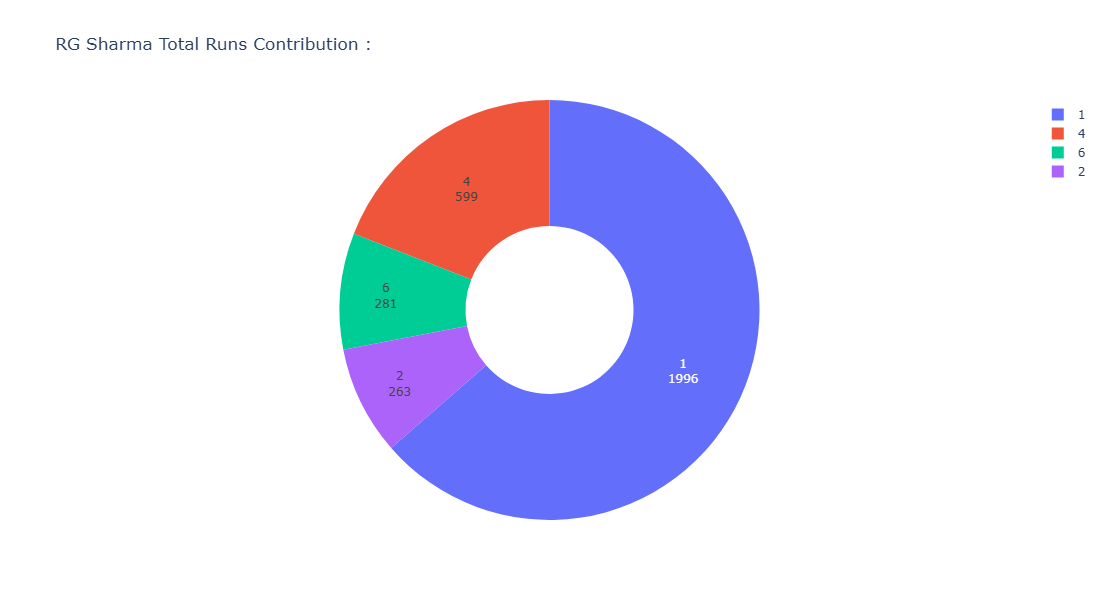

In [903]:
## Plot
fig = px.pie(runs,
            names = 'Run_Type',
            values = 'Total_Run',
            width = 1000, height = 600,
            labels = {'Run_Type' : 'Run_Type', 'Total_Run' : 'Total_Run'},
            title = f'{batsman} Total Runs Contribution :',
            hole =0.4)

## Format text 
fig.update_traces(textinfo = 'value+label')
fig.show()

In [907]:
## Data
batsman = 'V Kohli'

batsman_data = deliveries[deliveries['batter'] == batsman]
dismiss = batsman_data.groupby('batter')['dismissal_kind'].value_counts().reset_index()
dismiss_kind  = dismiss.tail(-1)

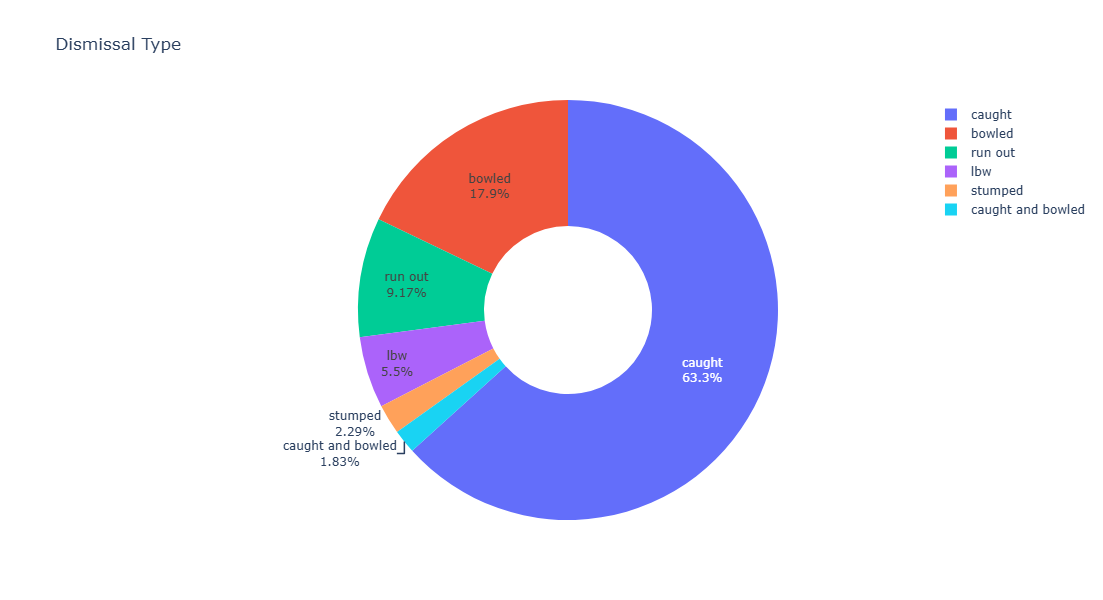

In [908]:
## Plot

fig = px.pie(dismiss_kind, names = 'dismissal_kind',
             values = 'count',
             width = 1000,
             height = 600,
             title = 'Dismissal Type',
             hole = 0.4)

## Format text
fig.update_traces(textinfo = 'label+percent')
fig.show()

In [913]:
run = 4
batsman_run = batsman_data[batsman_data['batsman_runs'] == run]
virat4_runs = batsman_run['batsman_runs'].count()
print(virat4_runs, 'Fours Hit By', batsman)

708 Fours Hit By V Kohli


In [914]:
run = 6
batsman_run = batsman_data[batsman_data['batsman_runs'] == run]
virat6_runs = batsman_run['batsman_runs'].count()
print(virat6_runs, 'Sixes Hit By', batsman)

273 Sixes Hit By V Kohli


In [915]:
virat_total_run = batsman_data['batsman_runs'].sum()
virat_total_run

8014

In [916]:
Run = [1,2,3,4,5,6]
for i in Run :
        print(batsman,'Scored Runs From',i,':', (batsman_data['batsman_runs'] == i).sum())
    


V Kohli Scored Runs From 1 : 2591
V Kohli Scored Runs From 2 : 445
V Kohli Scored Runs From 3 : 21
V Kohli Scored Runs From 4 : 708
V Kohli Scored Runs From 5 : 0
V Kohli Scored Runs From 6 : 273


In [917]:
## Data
run = batsman_data['batsman_runs'].value_counts().tail(-1).reset_index()
runs = run.head(4)
runs.columns = ['Run_Type', 'Total_Run']
runs

,Run_Type,Total_Run
0,0,2198
1,4,708
2,2,445
3,6,273


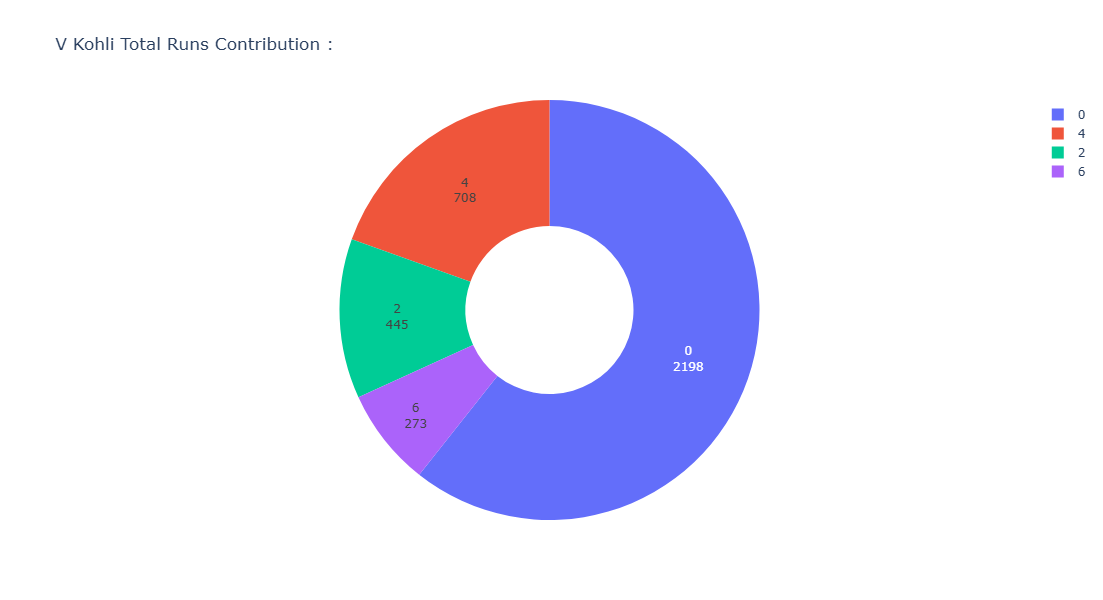

In [918]:
## Plot
fig = px.pie(runs,
            names = 'Run_Type',
            values = 'Total_Run',
            width = 1000, height = 600,
            labels = {'Run_Type' : 'Run_Type', 'Total_Run' : 'Total_Run'},
            title = f'{batsman} Total Runs Contribution :',
            hole =0.4)

## Format text 
fig.update_traces(textinfo = 'value+label')
fig.show()

In [919]:
## Data
batsman = 'MS Dhoni'

batsman_data = deliveries[deliveries['batter'] == batsman]
dismiss = batsman_data.groupby('batter')['dismissal_kind'].value_counts().reset_index()
dismiss_kind  = dismiss.tail(-1)

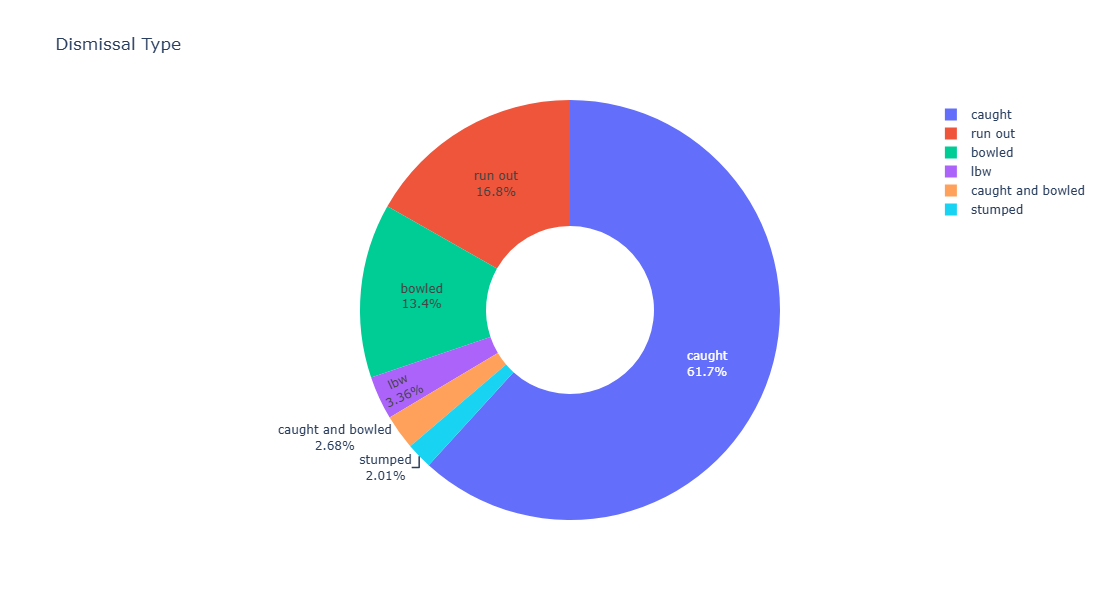

In [920]:
## Plot

fig = px.pie(dismiss_kind, names = 'dismissal_kind',
             values = 'count',
             width = 1000,
             height = 600,
             title = 'Dismissal Type',
             hole = 0.4)

## Format text
fig.update_traces(textinfo = 'label+percent')
fig.show()

In [921]:
run = 4
batsman_run = batsman_data[batsman_data['batsman_runs'] == run]
dhoni4_runs = batsman_run['batsman_runs'].count()
print(dhoni4_runs, 'Fours Hit By', batsman)

363 Fours Hit By MS Dhoni


In [922]:
run = 6
batsman_run = batsman_data[batsman_data['batsman_runs'] == run]
dhoni6_runs = batsman_run['batsman_runs'].count()
print(dhoni6_runs, 'Sixes Hit By', batsman)

252 Sixes Hit By MS Dhoni


In [923]:
dhoni_total_run = batsman_data['batsman_runs'].sum()
dhoni_total_run

5243

In [924]:
Run = [1,2,3,4,5,6]
for i in Run :
        print(batsman,'Scored Runs From',i,':', (batsman_data['batsman_runs'] == i).sum())
    


MS Dhoni Scored Runs From 1 : 1554
MS Dhoni Scored Runs From 2 : 340
MS Dhoni Scored Runs From 3 : 15
MS Dhoni Scored Runs From 4 : 363
MS Dhoni Scored Runs From 5 : 0
MS Dhoni Scored Runs From 6 : 252


In [925]:
## Data
run = batsman_data['batsman_runs'].value_counts().tail(-1).reset_index()
runs = run.head(4)
runs.columns = ['Run_Type', 'Total_Run']
runs

,Run_Type,Total_Run
0,0,1423
1,4,363
2,2,340
3,6,252


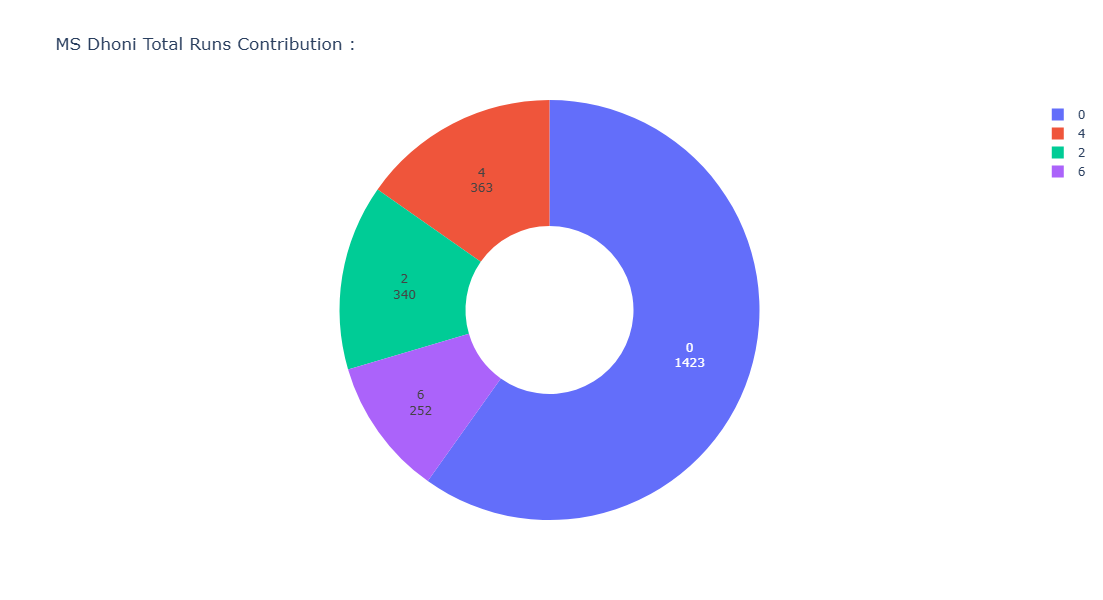

In [926]:
## Plot
fig = px.pie(runs,
            names = 'Run_Type',
            values = 'Total_Run',
            width = 1000, height = 600,
            labels = {'Run_Type' : 'Run_Type', 'Total_Run' : 'Total_Run'},
            title = f'{batsman} Total Runs Contribution :',
            hole =0.4)

## Format text 
fig.update_traces(textinfo = 'value+label')
fig.show()

17. Innings Wise Comparison Between Teams ?

In [927]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1092 non-null   int64 
 1   season                  1092 non-null   object
 2   city                    1092 non-null   object
 3   date                    1092 non-null   object
 4   match_type              1092 non-null   object
 5   player_of_match         1092 non-null   object
 6   venue                   1092 non-null   object
 7   team1                   1092 non-null   object
 8   team2                   1092 non-null   object
 9   toss_winner             1092 non-null   object
 10  toss_decision           1092 non-null   object
 11  winner                  1092 non-null   object
 12  result                  1092 non-null   object
 13  result_margin           1092 non-null   int32 
 14  target_runs             1092 non-null   int32 
 15  targ